In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WHR-2024-5CS037.csv')

In [114]:
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [115]:
print(df.shape)

(143, 9)


In [116]:
print(df.dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [117]:
print("Mean: ", df['score'].mean())
# This line calculates and prints the mean (average) of the 'score' column in the DataFrame `df`.
# The mean provides an overall average of the happiness scores in the dataset.

print("Median: ", df['score'].median())
# This line calculates and prints the median of the 'score' column in the DataFrame `df`.
# The median represents the middle value when all scores are sorted, giving an indication of the central tendency that is less sensitive to outliers.

print("Standard Deviation: ", df['score'].std())
# This line calculates and prints the standard deviation of the 'score' column in the DataFrame `df`.
# The standard deviation measures the amount of variability or dispersion in the scores, showing how spread out the values are from the mean.


Mean:  5.52758041958042
Median:  5.785
Standard Deviation:  1.1707165099442995


In [118]:
# Display a transposed summary statistics table for the dataframe.
# This includes count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for all numerical columns.
df.describe().T


,count,mean,std,min,25%,50%,75%,max
score,143.0,5.527580,1.170717,1.721,4.72600,5.7850,6.41600,7.741
Log GDP per capita,140.0,1.378807,0.425098,0.000,1.07775,1.4315,1.74150,2.141
Social support,140.0,1.134329,0.333317,0.000,0.92175,1.2375,1.38325,1.617
Healthy life expectancy,140.0,0.520886,0.164923,0.000,0.39800,0.5495,0.64850,0.857
Freedom to make life choices,140.0,0.620621,0.162492,0.000,0.52750,0.6410,0.73600,0.863
Generosity,140.0,0.146271,0.073441,0.000,0.09100,0.1365,0.19250,0.401
Perceptions of corruption,140.0,0.154121,0.126238,0.000,0.06875,0.1205,0.19375,0.575
Dystopia + residual,140.0,1.575914,0.537459,-0.073,1.30825,1.6445,1.88175,2.998


In [119]:
# Display a transposed summary statistics table for categorical (object) columns in the dataframe.
# This includes count, unique values, top (most frequent value), and frequency of the top value for each categorical column.
df.describe(include='object').T


,count,unique,top,freq
Country name,143,143,Finland,1


In [120]:
# Find the index of the row with the minimum happiness score
min_score_index = df['score'].idxmin()

# Find the index of the row with the maximum happiness score
max_score_index = df['score'].idxmax()

# Print the country name associated with the minimum happiness score
print("Country with minimum happiness score:", df.loc[min_score_index, 'Country name'])

# Print the country name associated with the maximum happiness score
print("Country with maximum happiness score:", df.loc[max_score_index, 'Country name'])



Country with minimum happiness score: Afghanistan
Country with maximum happiness score: Finland


In [121]:
#Counting total number of missing values for each column
df.isnull().sum()

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


In [122]:

# Dropping null rows.
df.dropna(inplace=True)

In [123]:
# Filter the DataFrame to include only rows where the happiness score is greater than 7.5
score_greater_df = df[df['score'] > 7.5]

# Display the first 5 rows of the filtered DataFrame
score_greater_df.head(5)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [124]:
# Sort the filtered DataFrame by 'Log GDP per capita' in descending order
score_greater_df_sorted = score_greater_df.sort_values(by='Log GDP per capita', ascending=False)

# Display the top 10 rows of the sorted DataFrame
score_greater_df_sorted.head(10)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [125]:
# Define conditions for categorizing happiness scores into Low, Medium, and High
conditions = [
    (df['score'] < 4),  # Scores less than 4 are categorized as 'Low'
    (df['score'] >= 4) & (df['score'] <= 6),  # Scores between 4 and 6 (inclusive) are categorized as 'Medium'
    (df['score'] > 6)  # Scores greater than 6 are categorized as 'High'
]

# Define the categories corresponding to the conditions
categories = ['Low', 'Medium', 'High']

# Create a new column 'Happiness Category' based on the conditions and categories
df['Happiness Category'] = np.select(conditions, categories)

# Display the first 10 rows of the updated DataFrame
df.head(10)



,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906,High
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586,High
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540,High
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488,High
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745,High


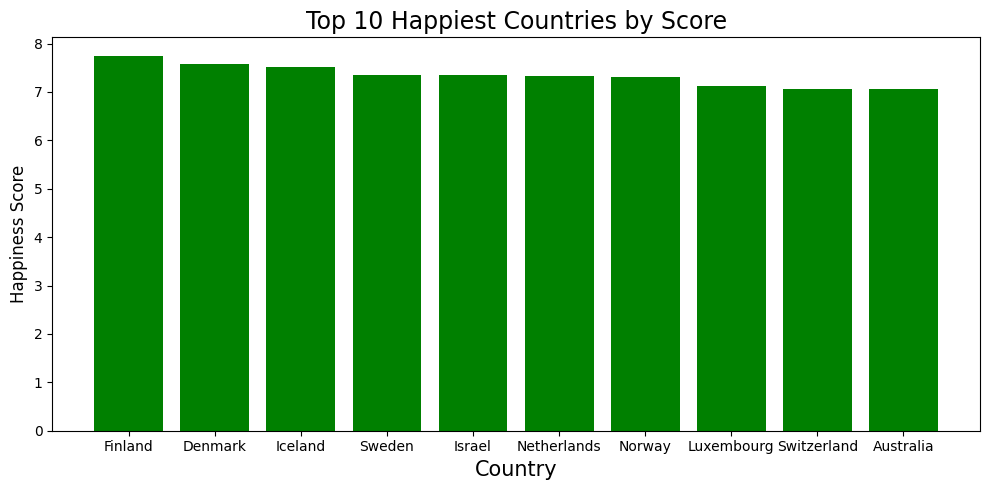

In [126]:
top_10_happiest = df.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'], color='green')

plt.xlabel('Country', fontsize=15)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Top 10 Happiest Countries by Score', fontsize=17)

plt.tight_layout()
plt.show()

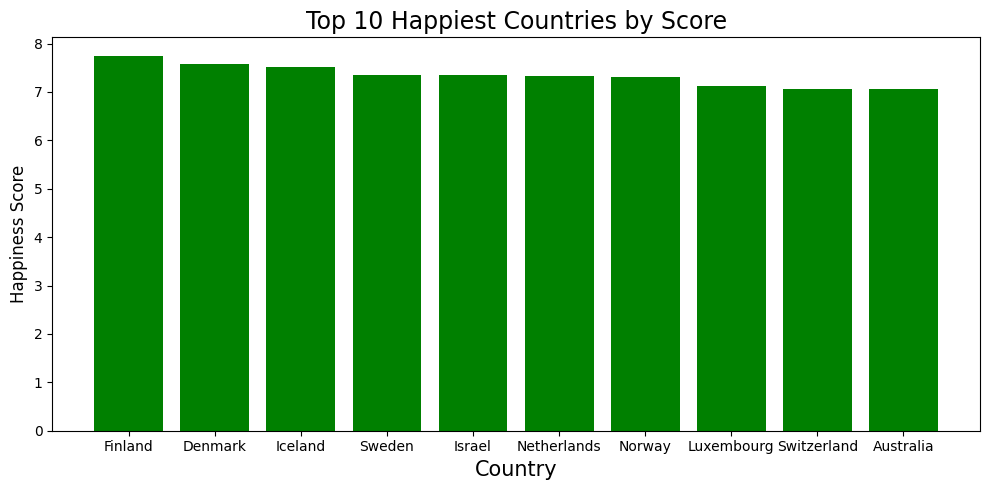

In [127]:
# Sort the DataFrame to get the top 10 happiest countries based on their happiness score
top_10_happiest = df.sort_values(by='score', ascending=False).head(10)

# Set the figure size for better visualization
plt.figure(figsize=(10, 5))

# Create a bar chart to display the happiness scores of the top 10 happiest countries
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'], color='green')

# Add labels for the x-axis and y-axis
plt.xlabel('Country', fontsize=15)  # Label for countries
plt.ylabel('Happiness Score', fontsize=12)  # Label for happiness scores

# Add a title to the chart
plt.title('Top 10 Happiest Countries by Score', fontsize=17)

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Display the bar chart
plt.show()



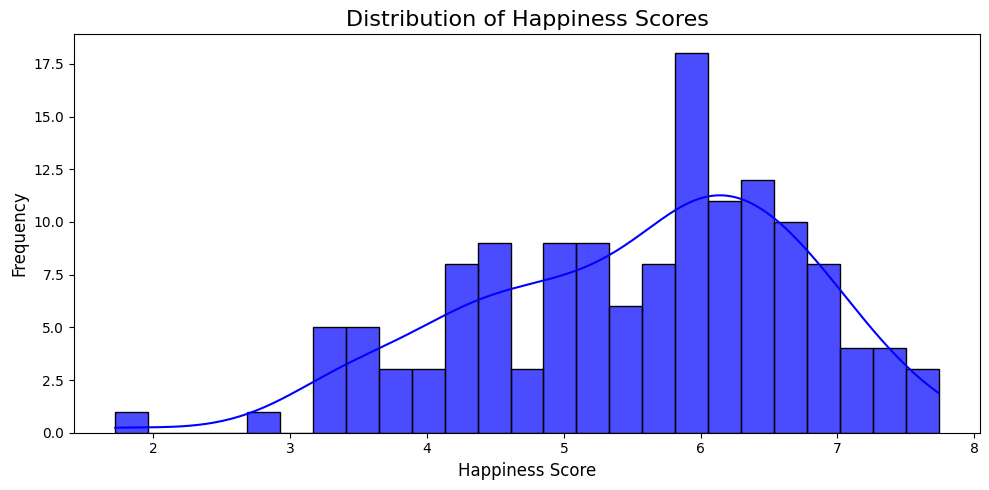

In [128]:
# Set figure size to 10x5 inches
plt.figure(figsize=(10, 5))

# Plot the histogram of 'score' from df with 25 bins, blue color, black edges, and KDE
sns.histplot(df['score'], bins=25, color='blue', alpha=0.7, edgecolor='black', kde=True)

# Label x-axis as 'Happiness Score' with font size 12
plt.xlabel('Happiness Score', fontsize=12)

# Label y-axis as 'Frequency' with font size 12
plt.ylabel('Frequency', fontsize=12)

# Title the plot as 'Distribution of Happiness Scores' with font size 16
plt.title('Distribution of Happiness Scores', fontsize=16)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()



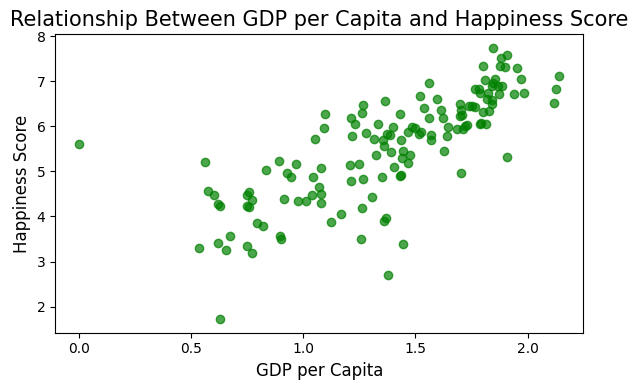

In [129]:
# Set figure size to 6x4 inches
plt.figure(figsize=(6, 4))

# Create a scatter plot of 'Log GDP per capita' vs 'score' with green points and 0.7 transparency
plt.scatter(df['Log GDP per capita'], df['score'], color='green', alpha=0.7)

# Label x-axis as 'GDP per Capita' with font size 12
plt.xlabel('GDP per Capita', fontsize=12)

# Label y-axis as 'Happiness Score' with font size 12
plt.ylabel('Happiness Score', fontsize=12)

# Title the plot as 'Relationship Between GDP per Capita and Happiness Score' with font size 15
plt.title('Relationship Between GDP per Capita and Happiness Score', fontsize=15)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()



In [130]:
# Get summary statistics for the DataFrame 'df' and transpose the result to make it more readable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,140.0,5.530893,1.181247,1.721,4.63175,5.8005,6.42625,7.741
Log GDP per capita,140.0,1.378807,0.425098,0.000,1.07775,1.4315,1.74150,2.141
Social support,140.0,1.134329,0.333317,0.000,0.92175,1.2375,1.38325,1.617
Healthy life expectancy,140.0,0.520886,0.164923,0.000,0.39800,0.5495,0.64850,0.857
Freedom to make life choices,140.0,0.620621,0.162492,0.000,0.52750,0.6410,0.73600,0.863
Generosity,140.0,0.146271,0.073441,0.000,0.09100,0.1365,0.19250,0.401
Perceptions of corruption,140.0,0.154121,0.126238,0.000,0.06875,0.1205,0.19375,0.575
Dystopia + residual,140.0,1.575914,0.537459,-0.073,1.30825,1.6445,1.88175,2.998


In [131]:
df.describe(include='object').T

,count,unique,top,freq
Country name,140,140,Finland,1
Happiness Category,140,3,Medium,67


In [132]:
# List of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter the DataFrame 'df' to include only rows where 'Country name' is in the 'south_asian_countries' list
south_asian_data = df[df['Country name'].isin(south_asian_countries)]

# Display the first 10 rows of the filtered data
south_asian_data.head(10)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [133]:
# Save the 'south_asian_data' DataFrame to a CSV file named 'south_asian_countries.csv' without including the index
south_asian_data.to_csv('south_asian_countries.csv', index=False)

# Read the CSV file 'south_asian_countries.csv' back into a new DataFrame 'south_asian_df'
south_asian_df = pd.read_csv('south_asian_countries.csv')


In [134]:
# Get summary statistics for the 'south_asian_df' DataFrame and transpose the result for better readability
south_asian_df.describe().T


,count,mean,std,min,25%,50%,75%,max
score,6.0,3.895667,1.177069,1.721,3.88900,3.9760,4.50625,5.158
Log GDP per capita,6.0,1.051833,0.245361,0.628,0.99100,1.0955,1.15500,1.361
Social support,6.0,0.611833,0.441024,0.000,0.33675,0.6265,0.90575,1.179
Healthy life expectancy,6.0,0.420333,0.125082,0.242,0.34500,0.4300,0.49550,0.586
Freedom to make life choices,6.0,0.553333,0.287022,0.000,0.55225,0.6180,0.73850,0.775
Generosity,6.0,0.150333,0.039267,0.091,0.14100,0.1440,0.16650,0.209
Perceptions of corruption,6.0,0.099500,0.046427,0.031,0.07750,0.1015,0.12025,0.167
Dystopia + residual,6.0,1.008500,0.718496,0.014,0.69300,0.8375,1.56700,1.907


In [135]:
south_asian_df.describe(include='object').T

,count,unique,top,freq
Country name,6,6,Nepal,1
Happiness Category,6,2,Medium,3


In [136]:
# Create a new column 'Composite Score' by calculating a weighted sum of 'Log GDP per capita', 'Social support', and 'Healthy life expectancy'
south_asian_df['Composite Score'] = (0.40 * south_asian_df['Log GDP per capita'] +
                                     0.30 * south_asian_df['Social support'] +
                                     0.30 * south_asian_df['Healthy life expectancy'])

# Display the first 6 rows of the DataFrame with the new 'Composite Score' column
south_asian_df.head(6)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


In [137]:
# Sort the 'south_asian_df' DataFrame by 'Composite Score' in descending order
south_asian_df_sort = south_asian_df.sort_values('Composite Score', ascending=False)

# Display the first 8 rows of the sorted DataFrame
south_asian_df_sort.head(8)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


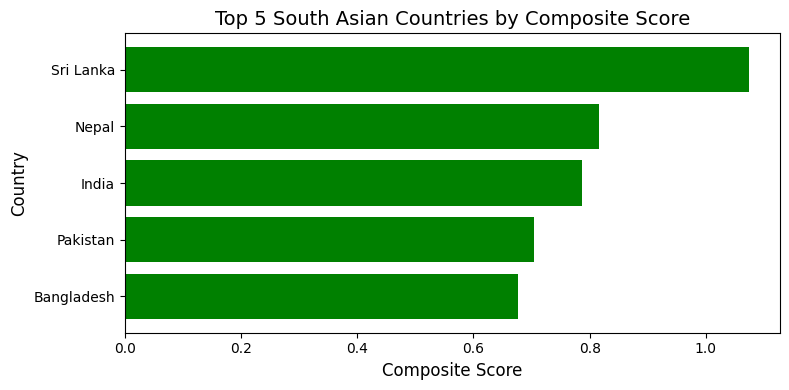

In [138]:
# Sort the DataFrame by Composite Score in descending order and select the top 5
south_asian_top_5 = south_asian_df_sort.head(5)

# Create a bar chart
plt.figure(figsize=(8, 4))
plt.barh(south_asian_top_5['Country name'], south_asian_top_5['Composite Score'],  color= 'green')
plt.xlabel('Composite Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 5 South Asian Countries by Composite Score', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

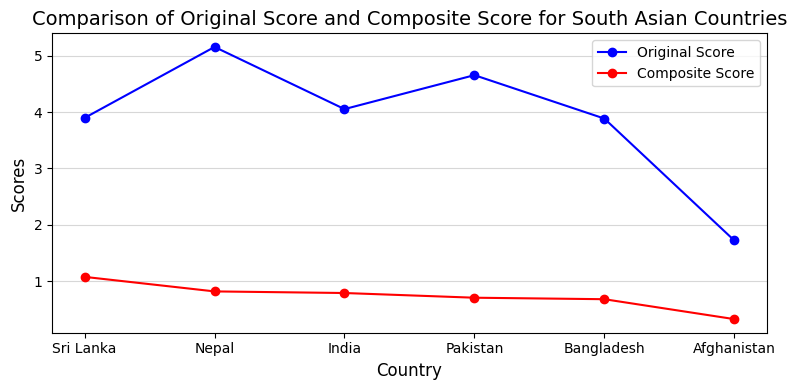

In [139]:
# Set figure size to 8x4 inches
plt.figure(figsize=(8, 4))

# Plot the 'score' for each country with blue color and markers, label it 'Original Score'
plt.plot(south_asian_df_sort['Country name'], south_asian_df_sort['score'], label='Original Score', marker='o', color='blue')

# Plot the 'Composite Score' for each country with red color and markers, label it 'Composite Score'
plt.plot(south_asian_df_sort['Country name'], south_asian_df_sort['Composite Score'], label='Composite Score', color='red', marker='o')

# Title of the plot with font size 14
plt.title('Comparison of Original Score and Composite Score for South Asian Countries', fontsize=14)

plt.xlabel('Country', fontsize=12)
plt.ylabel('Scores', fontsize=12)
# Show legend to differentiate the two lines
plt.legend()
# Add grid to the y-axis with some transparency (alpha=0.5)
plt.grid(alpha=0.5, axis='y')
# Adjust layout to prevent clipping of labels
plt.tight_layout()
# Show the plot
plt.show()



In [140]:
def identify_outliers(column, df):
    # Calculate the 1st (Q1) and 3rd (Q3) quartiles for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers that fall below the lower bound or above the upper bound
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Return the outliers and bounds
    return outliers, lower_bound, upper_bound

# Identify outliers for 'score' column
score_outliers, score_lower, score_upper = identify_outliers("score", south_asian_df_sort)

# Identify outliers for 'Log GDP per capita' column
gdp_outliers, gdp_lower, gdp_upper = identify_outliers("Log GDP per capita", south_asian_df_sort)

# Combine the outliers from both columns and remove duplicates
combined_outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# Print the combined outliers
print("\nCombined Outliers:")
combined_outliers




Combined Outliers:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
5,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


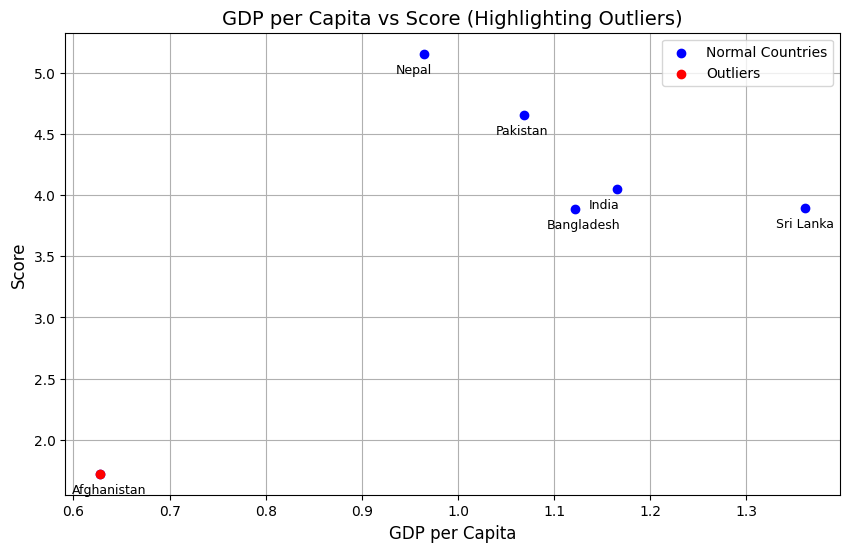

In [141]:

plt.figure(figsize=(10, 6))  # Set figure size to 10x6 inches

# Plot 'Log GDP per capita' vs 'score' for normal countries (blue dots)
plt.scatter(south_asian_df_sort["Log GDP per capita"], south_asian_df_sort["score"], color="blue", label="Normal Countries")

# Plot 'Log GDP per capita' vs 'score' for outliers (red dots)
plt.scatter(combined_outliers["Log GDP per capita"], combined_outliers["score"], color="red", label="Outliers")

# Adding labels and title
plt.title("GDP per Capita vs Score (Highlighting Outliers)", fontsize=14)  # Title of the plot
plt.xlabel("GDP per Capita", fontsize=12)  # Label for x-axis
plt.ylabel("Score", fontsize=12)  # Label for y-axis
plt.legend()  # Display the legend to differentiate normal countries and outliers
plt.grid()  # Add gridlines

# Add country names to each point in the scatter plot (black text)
for i, row in south_asian_df.iterrows():
    plt.text(
        row['Log GDP per capita']-0.03,  # x position, slightly offset for visibility
        row['score'] -0.16,               # y position, slightly offset for visibility
        row['Country name'],               # Text to display (country name)
        fontsize=9,                        # Font size for the text
        color='black'                      # Text color
    )

# Show plot
plt.show()


In [142]:

print("Outlier Countries based on Score:")
display(score_outliers)
print("\nOutlier Countries based on GDP per Capita:")
display(gdp_outliers)

print("\nCombined Outliers:")
display(combined_outliers)

Outlier Countries based on Score:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
5,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238



Outlier Countries based on GDP per Capita:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
5,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238



Combined Outliers:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
5,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


In [143]:
# Calculate the correlation between 'Freedom to make life choices' and 'score'
corr_metric1 = south_asian_df_sort['Freedom to make life choices'].corr(south_asian_df_sort['score'])

# Calculate the correlation between 'Generosity' and 'score'
corr_metric2 = south_asian_df_sort['Generosity'].corr(south_asian_df_sort['score'])

# Print the correlation values
print(f"Correlation between 'Freedom to make life choices' and 'score': {corr_metric1}")
print(f"Correlation between 'Generosity' and 'score': {corr_metric2}")



Correlation between 'Freedom to make life choices' and 'score': 0.8005185224163315
Correlation between 'Generosity' and 'score': 0.874512371253192


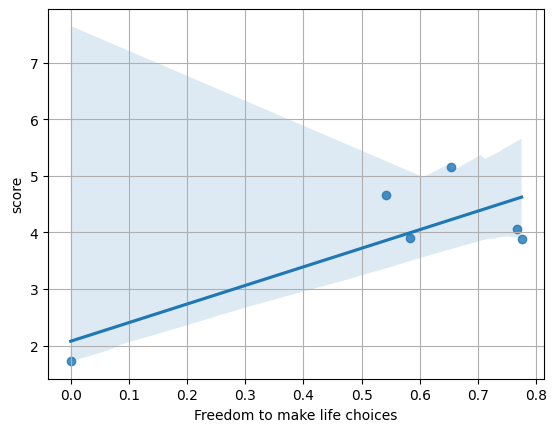

In [144]:
# Create a regression plot with a scatter plot for 'Freedom to make life choices' vs 'score'
sns.regplot(data=south_asian_df_sort, x='Freedom to make life choices', y='score', scatter=True)

# Add gridlines to the plot for better readability
plt.grid()


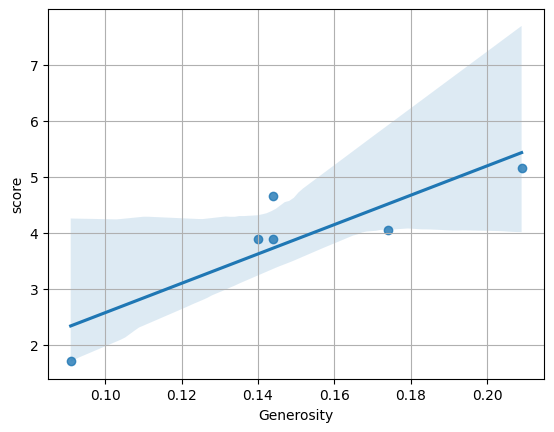

In [145]:
# Create a regression plot with a scatter plot for 'Generosity' vs 'score'
sns.regplot(data=south_asian_df_sort, x='Generosity', y='score', scatter=True)

# Add gridlines to the plot for better readability
plt.grid()


In [146]:
# Create a new column 'GDP-Score Gap' which calculates the absolute difference between 'Log GDP per capita' and 'score'
south_asian_df_sort['GDP-Score Gap'] = abs(south_asian_df_sort['Log GDP per capita'] - south_asian_df_sort['score'])

# Display the first 6 rows of the DataFrame with the new 'GDP-Score Gap' column
south_asian_df_sort.head(6)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,2.537
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,4.193
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,2.888
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,3.588
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,2.764
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,1.093


In [147]:
# Sort the DataFrame by 'GDP-Score Gap' in ascending order
south_asian_df_sort_asc = south_asian_df_sort.sort_values(by='GDP-Score Gap', ascending=True)

# Display the first 6 rows of the sorted DataFrame
south_asian_df_sort_asc.head(6)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,1.093
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,2.537
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,2.764
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,2.888
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,3.588
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,4.193


In [148]:
# Sort the DataFrame by 'GDP-Score Gap' in descending order
south_asian_df_sort_des = south_asian_df_sort.sort_values(by='GDP-Score Gap', ascending=False)

# Display the first 6 rows of the sorted DataFrame
south_asian_df_sort_des.head(6)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,4.193
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,3.588
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,2.888
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,2.764
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,2.537
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,1.093


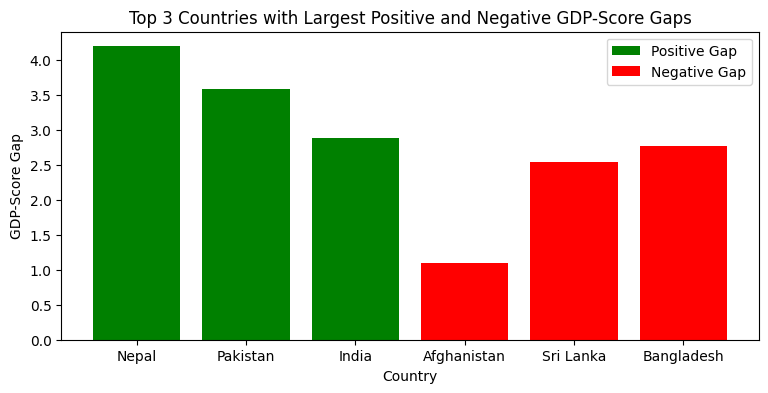

In [149]:
# Select the top 3 countries with the largest positive GDP-Score Gap (largest gaps in descending order)
top_3_positive = south_asian_df_sort_des.head(3)

# Select the top 3 countries with the smallest (negative) GDP-Score Gap (smallest gaps in ascending order)
top_3_negative = south_asian_df_sort_asc.head(3)

# Create a bar plot to visualize the top 3 countries with the largest positive and negative GDP-Score Gaps
plt.figure(figsize=(9, 4))  # Set figure size to 9x4 inches

# Plot the top 3 positive GDP-Score Gaps in green
plt.bar(top_3_positive['Country name'], top_3_positive['GDP-Score Gap'], color='green', label='Positive Gap')

# Plot the top 3 negative GDP-Score Gaps in red
plt.bar(top_3_negative['Country name'], top_3_negative['GDP-Score Gap'], color='red', label='Negative Gap')

# Add labels and title
plt.xlabel('Country')  # Label for x-axis
plt.ylabel('GDP-Score Gap')  # Label for y-axis
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps')  # Plot title

# Show legend to differentiate between positive and negative gaps
plt.legend()

# Display the plot
plt.show()


In [150]:
# List of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine",
    "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the DataFrame to only include data for Middle Eastern countries
middle_east_countries_data = df[df['Country name'].isin(middle_east_countries)]

# Save the filtered data to a CSV file (set 'index' to 'false' to avoid saving the index column)
middle_east_countries_data.to_csv('middle_east_countries_data', index=False)

# Read the CSV file into a new DataFrame, ensuring the first column is set as the index
middle_east_countries_df = pd.read_csv('middle_east_countries_data', index_col=0)




In [151]:
# Display the summary statistics of the 'middle_east_countries_df' DataFrame, transposed (for better readability)
middle_east_countries_df.describe().T


,count,mean,std,min,25%,50%,75%,max
score,9.0,5.351333,1.648656,2.707,4.186,5.166,6.733,7.341
Log GDP per capita,9.0,1.496333,0.416414,0.671,1.262,1.435,1.842,1.983
Social support,9.0,1.152778,0.278277,0.577,0.996,1.164,1.361,1.513
Healthy life expectancy,9.0,0.554111,0.123047,0.293,0.511,0.563,0.594,0.740
Freedom to make life choices,9.0,0.554333,0.234531,0.173,0.366,0.593,0.787,0.827
Generosity,9.0,0.139889,0.064785,0.059,0.080,0.141,0.200,0.235
Perceptions of corruption,9.0,0.145889,0.074122,0.029,0.113,0.172,0.189,0.258
Dystopia + residual,9.0,1.307778,0.782590,-0.073,0.760,1.741,1.809,2.298


In [152]:
middle_east_countries_df.describe(include='object').T

,count,unique,top,freq
Happiness Category,9,3,High,4


In [153]:
# Calculate and print the mean and standard deviation of the 'score' column for the Middle East countries DataFrame
print(f"Mean of score for Middle East: {middle_east_countries_df['score'].mean()}\nStandard deviation of score for Middle East : {middle_east_countries_df['score'].std()}")


Mean of score for Middle East: 5.351333333333333
Standard deviation of score for Middle East : 1.648656346847335


In [154]:
print(f"Mean of score for South Asia: {south_asian_df['score'].mean()}\nStandard deviation of score for South Asia : {south_asian_df['score'].std()}")

Mean of score for South Asia: 3.895666666666667
Standard deviation of score for South Asia : 1.1770690152521504


In [155]:
# Sort the Middle East countries DataFrame by 'score' in descending order (highest score first)
middle_east_countries_df_sort = middle_east_countries_df.sort_values(by='score', ascending=False)

# Select the top 3 countries with the highest scores
middle_east_countries_df_top3 = middle_east_countries_df_sort.head(3)



In [156]:
# Select the bottom 3 countries with the lowest scores from the sorted DataFrame
middle_east_countries_df_bottom3 = middle_east_countries_df_sort.tail(3)



In [157]:
# Display the top 3 rows of the sorted DataFrame (countries with the highest scores)
middle_east_countries_df_sort.head(3)


,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
Country name,,,,,,,,,
Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High


In [158]:
middle_east_countries_df_sort.tail(3)

,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
Country name,,,,,,,,,
Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


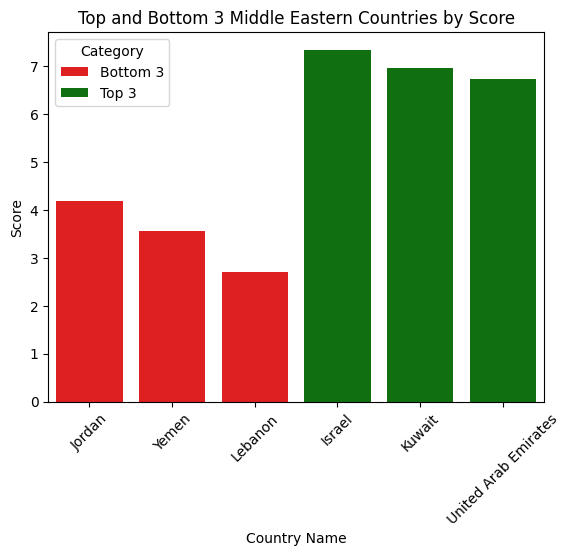

In [159]:
# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Combine the top 3 and bottom 3 countries DataFrames, assigning each set a 'Category' label
combined_df = pd.concat([
    middle_east_countries_df_bottom3.assign(Category="Bottom 3"),  # Add 'Bottom 3' label
    middle_east_countries_df_top3.assign(Category="Top 3")        # Add 'Top 3' label
])

# Create a bar plot to show 'score' for the top and bottom 3 countries
sns.barplot(data=combined_df, x='Country name', y='score', hue='Category', palette={'Top 3': 'green', 'Bottom 3': 'red'})

# Set the title, axis labels, and legend for the plot
plt.title("Top and Bottom 3 Middle Eastern Countries by Score")
plt.xlabel("Country Name")
plt.ylabel("Score")
plt.legend(title="Category")

# Display the plot
plt.show()


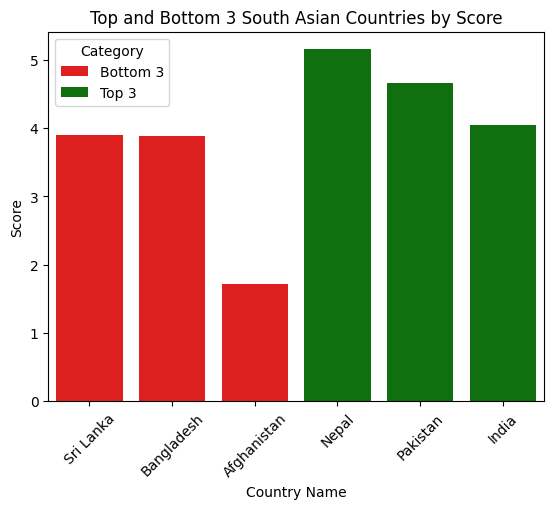

In [160]:
# Select the top 3 countries from the South Asian DataFrame (highest scores)
south_asian_top_3 = south_asian_df.head(3)

# Select the bottom 3 countries from the South Asian DataFrame (lowest scores)
south_asian_bottom_3 = south_asian_df.tail(3)

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Combine the top 3 and bottom 3 countries DataFrames, assigning each set a 'Category' label
combined_df = pd.concat([
    south_asian_bottom_3.assign(Category="Bottom 3"),  # Add 'Bottom 3' label
    south_asian_top_3.assign(Category="Top 3")        # Add 'Top 3' label
])

# Create a bar plot to show 'score' for the top and bottom 3 South Asian countries
sns.barplot(data=combined_df, x='Country name', y='score', hue='Category', palette={'Top 3': 'green', 'Bottom 3': 'red'})

# Set the title, axis labels, and legend for the plot
plt.title("Top and Bottom 3 South Asian Countries by Score")
plt.xlabel("Country Name")
plt.ylabel("Score")
plt.legend(title="Category")

# Display the plot
plt.show()


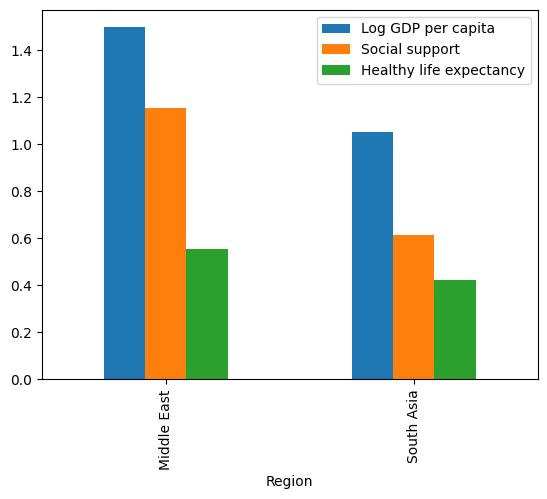

In [161]:
# Add a new column 'Region' to the South Asian DataFrame and label it as 'South Asia'
south_asian_df_sort['Region'] = 'South Asia'

# Add a new column 'Region' to the Middle Eastern DataFrame and label it as 'Middle East'
middle_east_countries_df['Region'] = 'Middle East'

# Combine the South Asian and Middle Eastern DataFrames, then group by 'Region' to calculate the mean of selected columns
grouped = pd.concat([south_asian_df_sort, middle_east_countries_df]).groupby('Region')[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()

# Create a bar plot to visualize the mean of the selected columns by region
grouped.plot(kind='bar')

# Display the plot
plt.show()


In [162]:
# Find the maximum and minimum happiness scores for South Asian countries
score_max_south_asian = south_asian_df_sort['score'].max()  # Max score in South Asia
score_min_south_asian = south_asian_df_sort['score'].min()  # Min score in South Asia

# Find the maximum and minimum happiness scores for Middle Eastern countries
score_max_middle_east = middle_east_countries_df['score'].max()  # Max score in Middle East
score_min_middle_east = middle_east_countries_df['score'].min()  # Min score in Middle East

# Calculate and print the range (difference between max and min) for both regions
print("Range of Happiness Scores in South Asia:", score_max_south_asian - score_min_south_asian)
print("Range of Happiness Scores in Middle East:", score_max_middle_east - score_min_middle_east)

# Calculate the Coefficient of Variation (CV) for happiness scores in South Asia
# CV = Standard Deviation / Mean, indicates relative variability
cv_sa = south_asian_df_sort['score'].std() / south_asian_df_sort['score'].mean()

# Calculate the Coefficient of Variation (CV) for happiness scores in Middle East
cv_me = middle_east_countries_df['score'].std() / middle_east_countries_df['score'].mean()

# Print the Coefficient of Variation for both regions
print("Coefficient of Variation for South Asia:", round(cv_sa, 4))
print("Coefficient of Variation for Middle East:", round(cv_me, 4))


Range of Happiness Scores in South Asia: 3.4370000000000003
Range of Happiness Scores in Middle East: 4.634
Coefficient of Variation for South Asia: 0.3021
Coefficient of Variation for Middle East: 0.3081


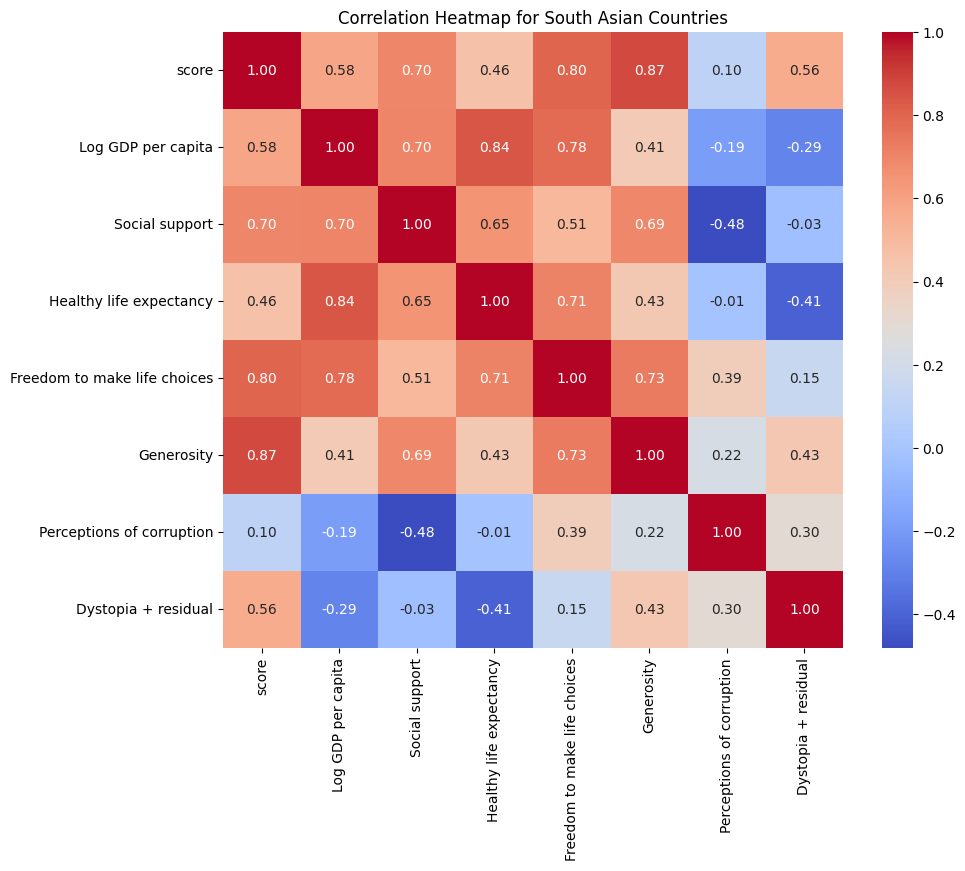

South Asia:
Correlation between Score and Freedom to Make Life Choices: 0.8005185224163315
Correlation between Score and Generosity: 0.874512371253192


In [163]:
# South Asia correlations
correlation_freedom_south_asia = south_asian_df_sort['score'].corr(south_asian_df_sort['Freedom to make life choices'])
correlation_generosity_south_asia = south_asian_df_sort['score'].corr(south_asian_df_sort['Generosity'])


# Select the columns you want to include in the heatmap
columns_for_heatmap = ['score', 'Log GDP per capita', 'Social support',
                       'Healthy life expectancy', 'Freedom to make life choices',
                       'Generosity', 'Perceptions of corruption','Dystopia + residual']

# Calculate the correlation matrix
correlation_matrix = south_asian_df_sort[columns_for_heatmap].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for South Asian Countries')
plt.show()

print("South Asia:")
print(f"Correlation between Score and Freedom to Make Life Choices: {correlation_freedom_south_asia}")
print(f"Correlation between Score and Generosity: {correlation_generosity_south_asia}")

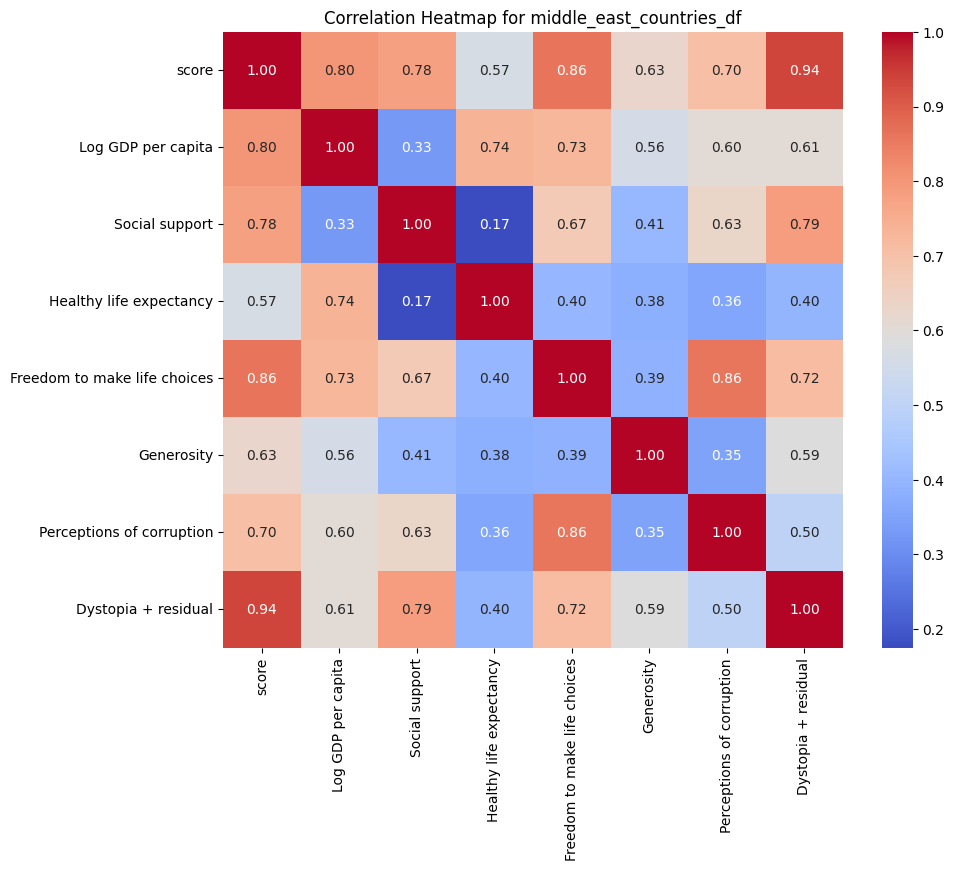


Middle East:
Correlation between Score and Freedom to Make Life Choices: 0.8632202433827544
Correlation between Score and Generosity: 0.6275236536964182


In [164]:
# Middle East correlations
correlation_freedom_middle_east = middle_east_countries_df['score'].corr(middle_east_countries_df['Freedom to make life choices'])
correlation_generosity_middle_east = middle_east_countries_df['score'].corr(middle_east_countries_df['Generosity'])

# Select the columns you want to include in the heatmap
columns_for_heatmap = ['score', 'Log GDP per capita', 'Social support',
                       'Healthy life expectancy', 'Freedom to make life choices',
                       'Generosity', 'Perceptions of corruption','Dystopia + residual']

# Calculate the correlation matrix
correlation_matrix = middle_east_countries_df[columns_for_heatmap].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for middle_east_countries_df')
plt.show()

print("\nMiddle East:")
print(f"Correlation between Score and Freedom to Make Life Choices: {correlation_freedom_middle_east}")
print(f"Correlation between Score and Generosity: {correlation_generosity_middle_east}")

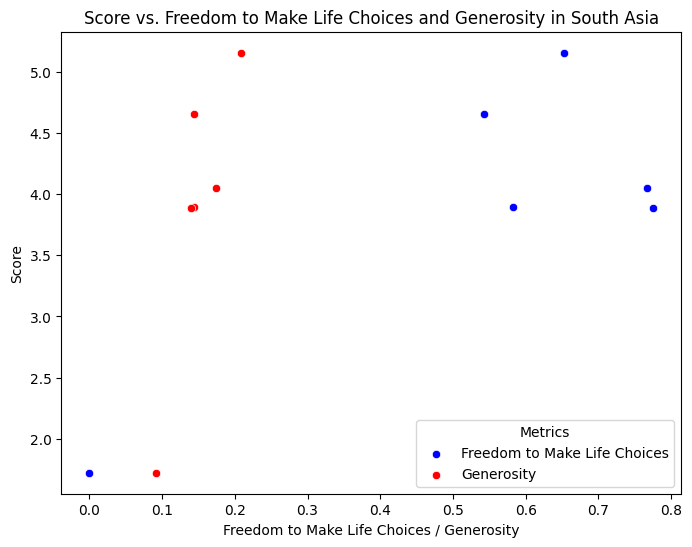

In [165]:
# Combined Scatter Plot: Score vs. Freedom to Make Life Choices and Score vs. Generosity in South Asia
plt.figure(figsize=(8, 6))

# Plot 1: Score vs. Freedom to Make Life Choices (Blue)
sns.scatterplot(x='Freedom to make life choices', y='score',
                data=south_asian_df_sort, color='blue', label='Freedom to Make Life Choices')

# Plot 2: Score vs. Generosity (Red)
sns.scatterplot(x='Generosity', y='score',
                data=south_asian_df_sort, color='red', label='Generosity')

plt.title('Score vs. Freedom to Make Life Choices and Generosity in South Asia')
plt.xlabel('Freedom to Make Life Choices / Generosity')
plt.ylabel('Score')
plt.legend(title='Metrics')
plt.show()


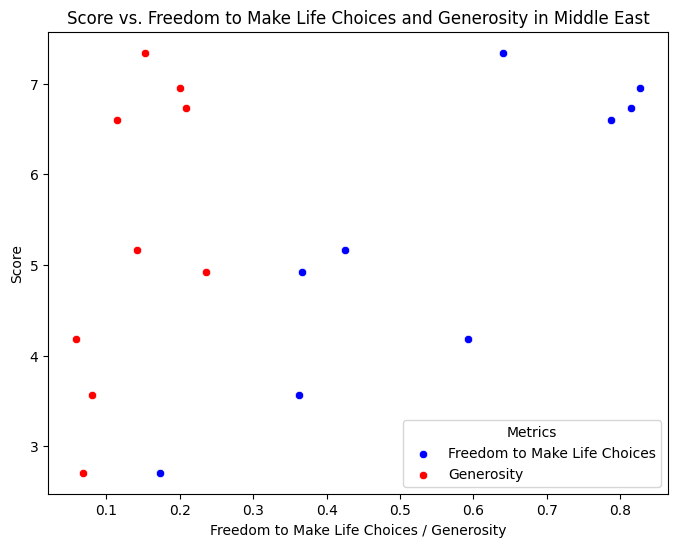

In [166]:
# Combined Scatter Plot: Score vs. Freedom to Make Life Choices and Score vs. Generosity in Middle East
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot 1: Score vs. Freedom to Make Life Choices (Blue)
sns.scatterplot(x='Freedom to make life choices', y='score',
                data=middle_east_countries_df, color='blue', label='Freedom to Make Life Choices')

# Plot 2: Score vs. Generosity (Red)
sns.scatterplot(x='Generosity', y='score',
                data=middle_east_countries_df, color='red', label='Generosity')

plt.title('Score vs. Freedom to Make Life Choices and Generosity in Middle East')
plt.xlabel('Freedom to Make Life Choices / Generosity')
plt.ylabel('Score')
plt.legend(title='Metrics')
plt.show()


In [167]:
# Identify outliers in the 'score' column for the Middle East countries DataFrame
score_outliers_me, score_lower, score_upper = identify_outliers("score", middle_east_countries_df_sort)

# Identify outliers in the 'Log GDP per capita' column for the Middle East countries DataFrame
gdp_outliers_me, gdp_lower, gdp_upper = identify_outliers("Log GDP per capita", middle_east_countries_df_sort)


In [169]:
# Print the outliers based on 'score' for Middle East countries
print("\nMiddle East - Outliers based on Score:")
print(score_outliers_me)

# Print the outliers based on 'Log GDP per capita' for Middle East countries
print("\nMiddle East - Outliers based on Log GDP per capita:")
print(gdp_outliers_me)



Middle East - Outliers based on Score:
Empty DataFrame
Columns: [score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual, Happiness Category]
Index: []

Middle East - Outliers based on Log GDP per capita:
Empty DataFrame
Columns: [score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual, Happiness Category]
Index: []


In [ ]:
# Create a figure with specified size for the scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for normal countries based on 'Log GDP per capita' and 'score', using blue color
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_countries_df_sort, color='blue', label='Normal Countries')

# Check if there are any outliers based on score and plot them in red
if not score_outliers_me.empty:
    sns.scatterplot(x='Log GDP per capita', y='score', data=score_outliers_me, color='red', label='Outliers (Score)')

# Check if there are any outliers based on GDP per capita and plot them in orange
if not gdp_outliers_me.empty:
    sns.scatterplot(x='Log GDP per capita', y='score', data=gdp_outliers_me, color='orange', label='Outliers (GDP per capita)')

# Set the title, labels, and legend for the plot
plt.title('Middle East: Outliers based on Score and GDP per capita')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.legend()

# Show the plot
plt.show()


In [ ]:
#Already made scatter plot for outiers of South Asian Countries above.

In [ ]:
# Create a boxplot to visualize the distribution of 'score' across different regions
sns.boxplot(data=south_asian_df_sort, y='Region', x='score')


In [ ]:
# Create a boxplot to visualize the distribution of 'score' for the Middle East region
sns.boxplot(data=middle_east_countries_df, y='Region', x='score')
